In [3]:
from statistics import linear_regression

import X
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [12]:
from pathlib import Path
data_path = Path("../data/melb_data.csv")
print(data_path.resolve())
print(data_path.exists())
df = pd.read_csv(data_path)
df.head()

C:\Users\Pakistan\PycharmProjects\PythonProject\First project\data\melb_data.csv
True


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [13]:
df.dtypes  # look for object columns (text) and your target


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [22]:
print(df.columns)

target="Price"
y = df[target]

#drop target to form x, then keep only numeric columns

X = df.drop(columns = [target])
X = X.select_dtypes(include = ["int64", "float64"])

#Fill missing

X = X.fillna(X.median(numeric_only=True))
y=y.fillna(y.median())
X.shape, y.shape



Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


((13580, 12), (13580,))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make sure X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

predict_lr = linreg.predict(X_test)
mse = mean_squared_error(y_test, predict_lr)   # no squared arg
rms = mse ** 0.5
mae = mean_absolute_error(y_test, predict_lr)
(mae, rms)


(293937.9817278596, 436946.54201930825)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

Scaler = StandardScaler()
X_train_s = Scaler.fit_transform(X_train)
X_test_s = Scaler.transform(X_test)

ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_s, y_train)

Predict_ridge = ridge.predict(X_test_s)

mae_ridge = mean_absolute_error(y_test, Predict_ridge)
mse_ridge = mean_squared_error(y_test, Predict_ridge)
rms_ridge = np.sqrt(mse_ridge)

(mae_ridge, rms_ridge)


(293934.2980012473, np.float64(436943.3876147234))

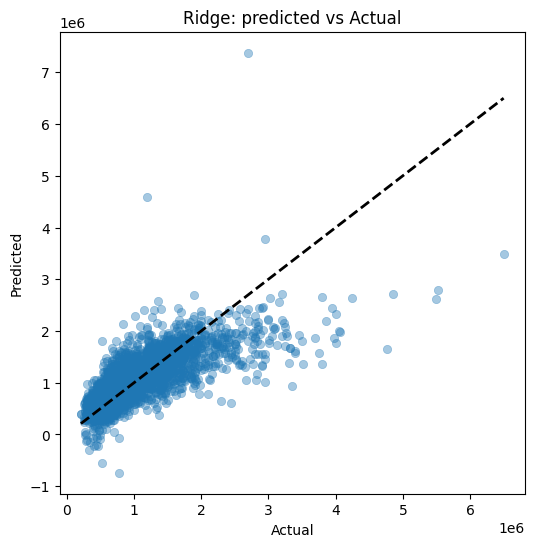

In [49]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=Predict_ridge, alpha = 0.4, edgecolor = None)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge: predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.show()

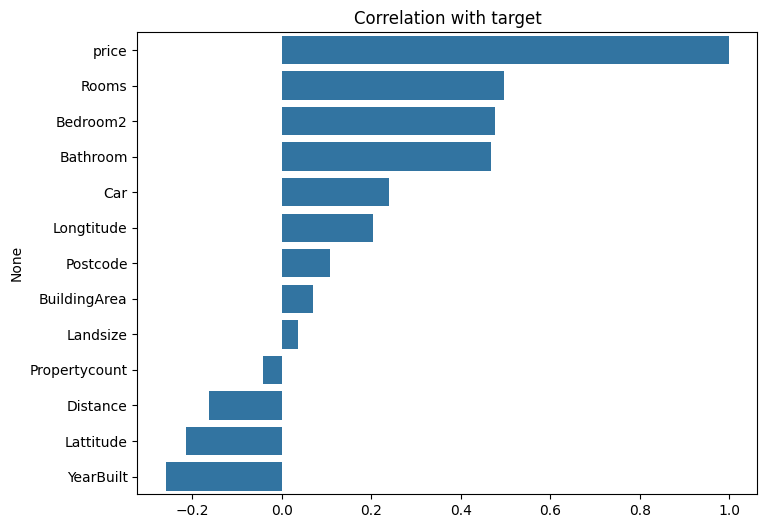

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


target_col = "price"
corr = pd.concat([X, y.rename(target_col)], axis=1).corr()[target_col].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation with target")
plt.show()

## Notes
- Dataset: melb_data.csv; target: Price; numeric-only baseline.
- Metrics: Linear MAE=X, RMS=Y; Ridge MAE=X2, RMS=Y2 (better/worse).
- Takeaway: Ridge + scaling improved error vs baseline.